The ten best-selling video games of all time!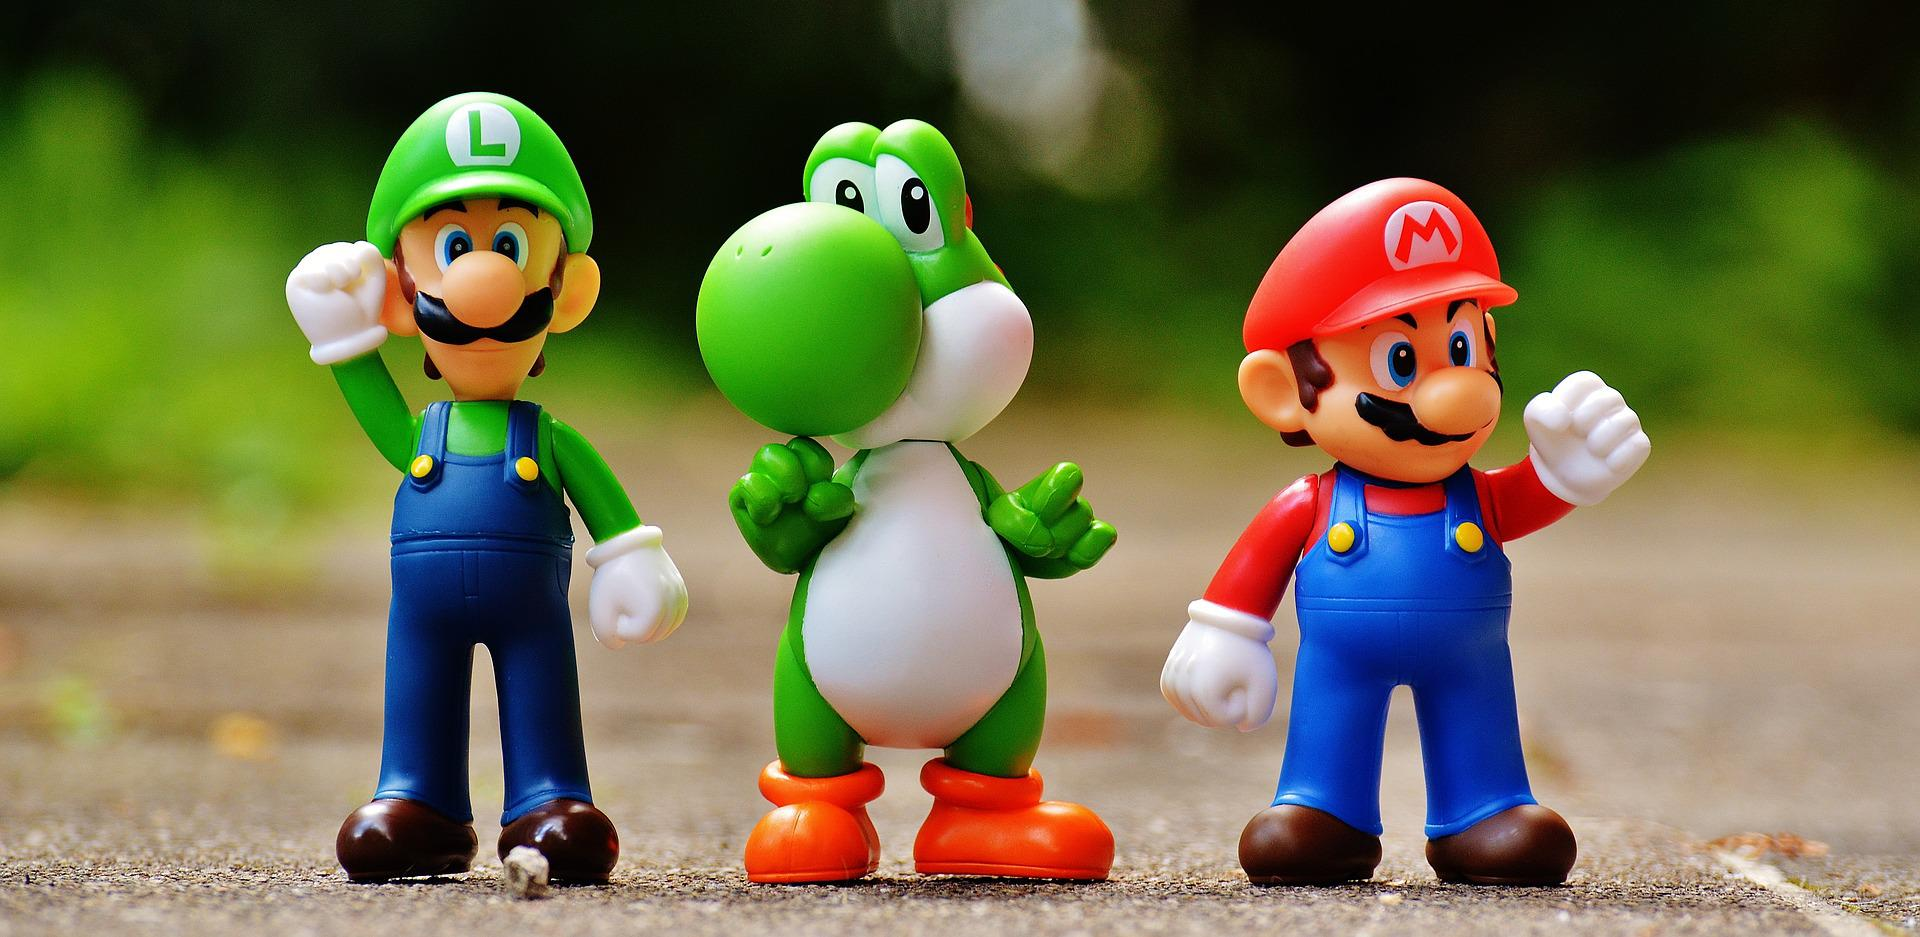

Video games have always been a part of my life since I was 6 years old. My first console was a Sega Genesis. Some of my brightest memories come from video games therefore I began a quest with this dataset from [Kaggle](https://www.kaggle.com/holmjason2/videogamedata) to find the golden age of video games. This dataset contains the top 400 best-selling video games created between 1977 and 2020. I will be demonstrating my SQL skills by filtering data from tables, using INNER JOINS & LEFT JOINS, SET theory, as well as creating suqueries. 

Thanks for checking it out!

<h3 id="game_sales"><code>game_sales</code></h3>
<table>
<thead>
<tr>
<th style="text-align:left;">column</th>
<th>type</th>
<th>meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;"><code>game</code></td>
<td>varchar</td>
<td>Name of the video game</td>
</tr>
<tr>
<td style="text-align:left;"><code>platform</code></td>
<td>varchar</td>
<td>Gaming platform</td>
</tr>
<tr>
<td style="text-align:left;"><code>publisher</code></td>
<td>varchar</td>
<td>Game publisher</td>
</tr>
<tr>
<td style="text-align:left;"><code>developer</code></td>
<td>varchar</td>
<td>Game developer</td>
</tr>
<tr>
<td style="text-align:left;"><code>games_sold</code></td>
<td>float</td>
<td>Number of copies sold (millions)</td>
</tr>
<tr>
<td style="text-align:left;"><code>year</code></td>
<td>int</td>
<td>Release year</td>
</tr>
</tbody>
</table>
<h3 id="reviews"><code>reviews</code></h3>
<table>
<thead>
<tr>
<th style="text-align:left;">column</th>
<th>type</th>
<th>meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;"><code>game</code></td>
<td>varchar</td>
<td>Name of the video game</td>
</tr>
<tr>
<td style="text-align:left;"><code>critic_score</code></td>
<td>float</td>
<td>Critic score according to Metacritic</td>
</tr>
<tr>
<td style="text-align:left;"><code>user_score</code></td>
<td>float</td>
<td>User score according to Metacritic</td>
</tr>
</tbody>
</table>
<p>Let's begin by looking at some of the top selling video games of all time!</p>

In [ ]:
%%sql
postgresql:///games

Select * 
FROM game_sales
ORDER BY games_sold DESC
LIMIT 10;


10 rows affected.


game,platform,publisher,developer,games_sold,year
Wii Sports for Wii,Wii,Nintendo,Nintendo EAD,82.90,2006
Super Mario Bros. for NES,NES,Nintendo,Nintendo EAD,40.24,1985
Counter-Strike: Global Offensive for PC,PC,Valve,Valve Corporation,40.00,2012
Mario Kart Wii for Wii,Wii,Nintendo,Nintendo EAD,37.32,2008
PLAYERUNKNOWN'S BATTLEGROUNDS for PC,PC,PUBG Corporation,PUBG Corporation,36.60,2017
Minecraft for PC,PC,Mojang,Mojang AB,33.15,2010
Wii Sports Resort for Wii,Wii,Nintendo,Nintendo EAD,33.13,2009
Pokemon Red / Green / Blue Version for GB,GB,Nintendo,Game Freak,31.38,1998
New Super Mario Bros. for DS,DS,Nintendo,Nintendo EAD,30.80,2006
New Super Mario Bros. Wii for Wii,Wii,Nintendo,Nintendo EAD,30.30,2009


## 2. Missing review scores
<p>Wow, the best-selling video games were released between 1985 to 2017! That's quite a range; I'll have to use data from the <code>reviews</code> table to gain more insight on the best years for video games. </p>
<p>First, it's important to explore the limitations of our database. One big shortcoming is that there is not any <code>reviews</code> data for some of the games on the <code>game_sales</code> table. </p> 

Therefore, I will perform a LEFT JOIN to see just how many rows have missing values for <code>user_score</code> and <code>critic_score</code> 

In [ ]:
%%sql 

SELECT COUNT(gs.game)
FROM game_sales AS gs
LEFT JOIN reviews AS r
ON (gs.game=r.game)
WHERE critic_score IS NULL AND user_score IS NULL

 * postgresql:///games
1 rows affected.


count
31


## 3. Years that video game critics loved
<p>It looks like a little less than ten percent of the games on the <code>game_sales</code> table don't have any reviews data. That's a small enough percentage that we can continue our exploration, but the missing reviews data is a good thing to keep in mind as we move on to evaluating results from more sophisticated queries. </p>
<p>There are lots of ways to measure the best years for video games! Let's start with what the critics think. </p>

I will perform an INNER JOIN connecting the <code>game_sales</code> table and the <code>reviews</code> table to get average critic scores

In [ ]:
%%sql

SELECT year, ROUND(AVG(critic_score), 2) AS Avg_Critic_Score
FROM game_sales
INNER JOIN reviews
ON game_sales.game=reviews.game
GROUP BY year
ORDER BY Avg_Critic_Score DESC
LIMIT 10;

 * postgresql:///games
10 rows affected.


year,avg_critic_score
1990,9.80
1992,9.67
1998,9.32
2020,9.20
1993,9.10
1995,9.07
2004,9.03
1982,9.00
2002,8.99
1999,8.93


## 4. Was 1982 really that great?
<p>The range of great years according to critic reviews goes from 1982 until 2020: we are no closer to finding the golden age of video games! </p>
<p>Hang on, though. Some of those <code>avg_critic_score</code> values look like suspiciously round numbers for averages. The value for 1982 looks especially fishy. Maybe there weren't a lot of video games in our dataset that were released in certain years. </p>
<p>Let's update our query and find out whether 1982 really was such a great year for video games.</p>

I use an INNER JOIN and the HAVING clause to visualize how many games were released and the avg critic score for each year 

In [ ]:
%%sql 

SELECT year, ROUND(AVG(critic_score), 2) AS Avg_Critic_Score, COUNT(game_sales.game) AS num_games
FROM game_sales
INNER JOIN reviews
ON game_sales.game=reviews.game
GROUP BY year
HAVING COUNT(game_sales.game) > 4
ORDER BY Avg_Critic_Score DESC
LIMIT 10;



 * postgresql:///games
10 rows affected.


year,avg_critic_score,num_games
1998,9.32,10
2004,9.03,11
2002,8.99,9
1999,8.93,11
2001,8.82,13
2011,8.76,26
2016,8.67,13
2013,8.66,18
2008,8.63,20
2012,8.62,12


## 5. Years that dropped off the critics' favorites list
<p>That looks better! The <code>num_games</code> column convinces us that our new list of the critics' top games reflects years that had quite a few well-reviewed games rather than just one or two hits. But which years dropped off the list due to having four or fewer reviewed games? Let's identify them so that someday we can track down more game reviews for those years and determine whether they might rightfully be considered as excellent years for video game releases!</p>
<p> I will begin demonstrating my use of SET theory with the EXCEPT and INTERSECT clauses </p>
<h3 id="top_critic_years"><code>top_critic_years</code></h3>
<table>
<thead>
<tr>
<th style="text-align:left;">column</th>
<th>type</th>
<th>meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;"><code>year</code></td>
<td>int</td>
<td>Year of video game release</td>
</tr>
<tr>
<td style="text-align:left;"><code>avg_critic_score</code></td>
<td>float</td>
<td>Average of all critic scores for games released in that year</td>
</tr>
</tbody>
</table>
<h3 id="top_critic_years_more_than_four_games"><code>top_critic_years_more_than_four_games</code></h3>
<table>
<thead>
<tr>
<th style="text-align:left;">column</th>
<th>type</th>
<th>meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;"><code>year</code></td>
<td>int</td>
<td>Year of video game release</td>
</tr>
<tr>
<td style="text-align:left;"><code>num_games</code></td>
<td>int</td>
<td>Count of the number of video games released in that year</td>
</tr>
<tr>
<td style="text-align:left;"><code>avg_critic_score</code></td>
<td>float</td>
<td>Average of all critic scores for games released in that year</td>
</tr>
</tbody>
</table>

In [ ]:
%%sql 
SELECT year, avg_critic_score
FROM top_critic_years as t
EXCEPT
    (SELECT year, avg_critic_score
     FROM top_critic_years_more_than_four_games)
ORDER BY avg_critic_score DESC


 * postgresql:///games
6 rows affected.


year,avg_critic_score
1990,9.80
1992,9.67
2020,9.20
1993,9.10
1995,9.07
1982,9.00


## 6. Years video game players loved
<p>Based on our work in the task above, it looks like the early 1990s might merit consideration as the golden age of video games based on <code>critic_score</code> alone, but we'd need to gather more games and reviews data to do further analysis. </p>
<p>Let's move on to looking at the opinions of another important group of people: players! To begin, let's create a query very similar to the one we used in Task Four, except this one will look at <code>user_score</code> averages by year rather than <code>critic_score</code> averages.</p>

In [ ]:
%%sql 


SELECT g.year, AVG(r.user_score) as avg_user_score, COUNT(g.game) AS num_games
FROM game_sales as g
INNER JOIN reviews as r
ON g.game=r.game
GROUP BY g.year
HAVING COUNT(g.game) > 4
ORDER BY avg_user_score DESC
LIMIT 10;



 * postgresql:///games
10 rows affected.


year,avg_user_score,num_games
1997,9.5000000000000000,8
1998,9.4000000000000000,10
2010,9.2400000000000000,23
2009,9.1777777777777778,20
2008,9.0272727272727273,20
1996,9.0000000000000000,5
2005,8.9500000000000000,13
2006,8.9500000000000000,16
2000,8.8000000000000000,8
1999,8.8000000000000000,11


## 7. Years that both players and critics loved
<p>Alright, we've got a list of the top ten years according to both critic reviews and user reviews. Are there any years that showed up on both tables? If so, those years would certainly be excellent ones!</p>
<p>Recall that we have access to the <code>top_critic_years_more_than_four_games</code> table, which stores the results of our top critic years query from Task 4:</p>
<h3 id="top_critic_years_more_than_four_games"><code>top_critic_years_more_than_four_games</code></h3>
<table>
<thead>
<tr>
<th style="text-align:left;">column</th>
<th>type</th>
<th>meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;"><code>year</code></td>
<td>int</td>
<td>Year of video game release</td>
</tr>
<tr>
<td style="text-align:left;"><code>num_games</code></td>
<td>int</td>
<td>Count of the number of video games released in that year</td>
</tr>
<tr>
<td style="text-align:left;"><code>avg_critic_score</code></td>
<td>float</td>
<td>Average of all critic scores for games released in that year</td>
</tr>
</tbody>
</table>
<p>We've also saved the results of our top user years query from the previous task into a table:</p>
<h3 id="top_user_years_more_than_four_games"><code>top_user_years_more_than_four_games</code></h3>
<table>
<thead>
<tr>
<th style="text-align:left;">column</th>
<th>type</th>
<th>meaning</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left;"><code>year</code></td>
<td>int</td>
<td>Year of video game release</td>
</tr>
<tr>
<td style="text-align:left;"><code>num_games</code></td>
<td>int</td>
<td>Count of the number of video games released in that year</td>
</tr>
<tr>
<td style="text-align:left;"><code>avg_user_score</code></td>
<td>float</td>
<td>Average of all user scores for games released in that year</td>
</tr>
</tbody>
</table>

In [ ]:
%%sql 

SELECT tc.year
FROM top_critic_years_more_than_four_games as tc
INTERSECT
SELECT tu.year
FROM top_user_years_more_than_four_games as tu



 * postgresql:///games
3 rows affected.


year
1998
2008
2002


## 8. Sales in the best video game years
<p>Looks like we've got three years that both users and critics agreed were in the top ten! There are many other ways of measuring what the best years for video games are, but let's stick with these years for now. We know that critics and players liked these years, but what about video game makers? Were sales good? Let's find out.</p>
<p>Here I perform a subquery using the query from the previous task because we don't always have write permissions on the database we are querying.</p>

In [ ]:
%%sql 

SELECT year, SUM(games_sold) AS total_games_sold
FROM game_sales
WHERE year IN
    (SELECT tc.year
FROM top_critic_years_more_than_four_games as tc
INTERSECT
SELECT tu.year
FROM top_user_years_more_than_four_games as tu)
GROUP BY year
ORDER BY total_games_sold DESC


 * postgresql:///games
3 rows affected.


year,total_games_sold
2008,175.07
1998,101.52
2002,58.67


This project was inspired by DataCamp's SQL project, [When Was the Golden Age of Video Games](https://projects.datacamp.com/projects/1413)